In [1]:
import sys
import numpy as np
import time
import matplotlib.pyplot as plt
from scipy import interpolate 
sys.path.append(r'C:\Chuji\Code_and_Data\MyCode')

import Circuit_Simulator 
import PulseGenerator as PG
from toolfunc import *
from toolfunc.adia_analysis import *
from toolfunc.pulse_filter import *
import scipy.optimize as sci_op
from toolfunc import DE

In [2]:
Error_one = np.loadtxt(r'C:\Chuji\Latex_Papers\Mypapers\ZZ_coupling_20210205\fig_zz\Robustness\error_one_distor_30ns.txt')
Param_one = np.loadtxt(r'C:\Chuji\Latex_Papers\Mypapers\ZZ_coupling_20210205\fig_zz\Robustness\params_one_distor_30ns.txt')

Error_one2 = np.loadtxt(r'C:\Chuji\Latex_Papers\Mypapers\ZZ_coupling_20210205\fig_zz\Robustness\error_one_distor_30ns_6_20ns.txt')
Param_one2 = np.loadtxt(r'C:\Chuji\Latex_Papers\Mypapers\ZZ_coupling_20210205\fig_zz\Robustness\params_one_distor_30ns_6_20ns.txt')

Error_two = np.loadtxt(r'C:\Chuji\Latex_Papers\Mypapers\ZZ_coupling_20210205\fig_zz\Robustness\error_two_distor_30ns.txt')
Param_two = np.loadtxt(r'C:\Chuji\Latex_Papers\Mypapers\ZZ_coupling_20210205\fig_zz\Robustness\params_two1_distor_30ns.txt')

OSError: C:\Chuji\Latex_Papers\Mypapers\ZZ_coupling_20210205\fig_zz\Robustness\error_one_distor_30ns.txt not found.

In [ ]:
Tr_arr = np.arange(0.5e-9,10.1e-9,0.5e-9)
factor_r_arr = np.linspace(-0.1,0.1,21)

In [ ]:
from matplotlib.colors import LogNorm
from matplotlib import cm
from matplotlib import *

Tr_arr = np.arange(0.5e-9,20.1e-9,0.5e-9)
factor_r_arr = np.linspace(-0.1,0.1,21)

fig = plt.figure(figsize=[8.0,7.2])
ax = fig.add_axes([0.15,0.10,0.72,0.8])
ax_colorbar = fig.add_axes([0.88,0.10,0.016,0.8])

X,Y = np.meshgrid(factor_r_arr,Tr_arr*1e9)

im = ax.pcolor(X,Y,Error_two,cmap=cm.coolwarm,norm = LogNorm())
# im = ax.pcolor(X,Y,Param_one2)



colarbar= plt.colorbar(im,cax=ax_colorbar)

# ax.set_xlabel('Q1Q2detuning (GHz)',fontsize=16)
# ax.set_ylabel('Coupler Anhar (GHz)',fontsize=16)
ax.tick_params(labelsize=16)
plt.tick_params(labelsize=16)

In [ ]:
from matplotlib.colors import LogNorm
from matplotlib import cm
from matplotlib import *

Tr_arr = np.arange(6e-9,20.1e-9,0.5e-9)
factor_r_arr = np.linspace(-0.1,0.1,21)

fig = plt.figure(figsize=[8.0,7.2])
ax = fig.add_axes([0.15,0.10,0.72,0.8])
ax_colorbar = fig.add_axes([0.88,0.10,0.016,0.8])

X,Y = np.meshgrid(factor_r_arr,Tr_arr*1e9)

im = ax.pcolor(X,Y,Error_one2,cmap=cm.coolwarm,norm = LogNorm())
# im = ax.pcolor(X,Y,Param_one2)



colarbar= plt.colorbar(im,cax=ax_colorbar)

# ax.set_xlabel('Q1Q2detuning (GHz)',fontsize=16)
# ax.set_ylabel('Coupler Anhar (GHz)',fontsize=16)
ax.tick_params(labelsize=16)
plt.tick_params(labelsize=16)

In [ ]:
Tr_arr[20]

In [5]:
gate_time=60e-9
SRATE=10e9
f_term=2
factor_r=-0.0
T_reflex=5e-9

factor1=1.0 
factorc=1.0 
factor2=1.0 

lamb1 = [1.22936097, 0.57456054]
total_len = gate_time + 8e-9+4*T_reflex

Seq=PG.Sequence(total_len=total_len,sample_rate=SRATE,complex_trace=False)
Seq.clear_pulse(tips_on=False)
Seq.add_pulse('Adiabatic',t0=gate_time/2+8e-9/2+4e-9,width=gate_time,plateau=0e-9,frequency=0,F_Terms=f_term,Lcoeff=np.array(lamb1),Q1_freq=6.0e9,
             CPLR_idle_freq=(7.87e9-6e9)*1+6e9,Q2_freq=6e9+(5.4e9-6e9)*factor2,constant_coupling=False,r1c=0.018*factor1,r2c=0.018*factor2,r12=0.0015*factorc,anhar_CPLR=-300e6*factorc,
             anhar_Q1=-250e6*factor1,anhar_Q2=-250e6*factor2,negative_amplitude=False,dfdV=1e9,gap_threshold=8e6,freqpoints=301,pulsepoints=601)
Seq.add_filter('Reflection',*(factor_r,T_reflex))
Seq.add_filter('Gauss Low Pass',300e6)

flux_pulse=Seq.get_sequence()

plt.plot(flux_pulse_distor/np.max(flux_pulse_distor))
plt.plot(flux_pulse/np.max(flux_pulse))

NameError: name 'flux_pulse_distor' is not defined

In [ ]:
plt.plot(flux_pulse_distor/np.max(flux_pulse_distor))
plt.plot(flux_pulse/np.max(flux_pulse))

In [3]:
Error_one_5ns = np.loadtxt(r'C:\Chuji\Latex_Papers\Mypapers\ZZ_coupling_20210205\fig_zz\Robustness\error_one_distor_5ns.txt')
Error_two_5ns = np.loadtxt(r'C:\Chuji\Latex_Papers\Mypapers\ZZ_coupling_20210205\fig_zz\Robustness\error_two_distor_5ns.txt')
Param_two_5ns = np.loadtxt(r'C:\Chuji\Latex_Papers\Mypapers\ZZ_coupling_20210205\fig_zz\Robustness\param_two_distor_5ns.txt')


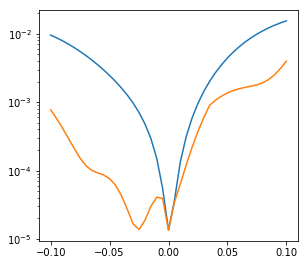

In [4]:
fig = plt.figure(figsize=[5,4])
ax = fig.add_axes([0.15,0.10,0.72,0.8])

ax.plot(np.linspace(-0.1,0.1,41),Error_one_5ns)
ax.plot(np.linspace(-0.1,0.1,41),Error_two_5ns)

ax.set_yscale('log')

In [8]:
Error_one_0_30ns = np.loadtxt(r'C:\Chuji\Latex_Papers\Mypapers\ZZ_coupling_20210205\fig_zz\Robustness\error_one_distor_0ns_30ns.txt')
Error_two_0_30ns = np.loadtxt(r'C:\Chuji\Latex_Papers\Mypapers\ZZ_coupling_20210205\fig_zz\Robustness\error_two_distor_0ns_30ns.txt')


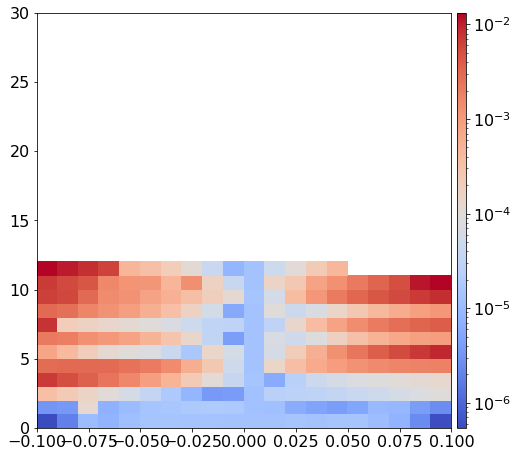

In [102]:
from matplotlib.colors import LogNorm
from matplotlib import cm
from matplotlib import *

Tr_arr = np.arange(0e-9,30.1e-9,1e-9)
factor_r_arr = np.linspace(-0.1,0.1,21)

fig = plt.figure(figsize=[8.0,7.2])
ax = fig.add_axes([0.15,0.10,0.72,0.8])
ax_colorbar = fig.add_axes([0.88,0.10,0.016,0.8])

X,Y = np.meshgrid(factor_r_arr,Tr_arr*1e9)

im = ax.pcolor(X,Y,Error_two_0_30ns,cmap=cm.coolwarm,norm = LogNorm())
# im = ax.pcolor(X,Y,Param_one2)



colarbar= plt.colorbar(im,cax=ax_colorbar)

# ax.set_xlabel('Q1Q2detuning (GHz)',fontsize=16)
# ax.set_ylabel('Coupler Anhar (GHz)',fontsize=16)
ax.tick_params(labelsize=16)
plt.tick_params(labelsize=16)